<a href="https://colab.research.google.com/github/NikoletaEm/datasps/blob/main/Extra_Credit_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: NYC Water Consumption - Water Resource Analyst Report


---

**MODIFICATION: This is now an EXTRA CREDIT Assignment - since we had to cancel the live meetup.  DO NOT worry about presenting!  Just submit a copy of this google colab file with at least two questions answered to receive some extra credit!**  

Next meetup 4/8

---



**Overview**

In this one-hour live meetup, you’ll work in small groups (2-3 students) as Water Resource Analysts for the NYC Department of Environmental Protection.

Your team will analyze the NYC Water Consumption Dataset, which tracks annual water usage and related metrics across the city from 1979 onward. Your task is to uncover trends, identify factors affecting consumption, and propose a data-driven water conservation initiative for NYC.

Each group will present a concise "Water Savings Report" to the "DEP Council" (the class), simulating a professional briefing, and the class will vote on the most innovative proposal.


Time Limit: 60 minutes

Dataset: "Water Consumption in the New York City" (available via NYC Open Data API: https://data.cityofnewyork.us/resource/ia2d-e54m.json).

Tools: Python with pandas, matplotlib, and seaborn in Google Colab.
Deliverable: A 2-3 minute "Water Savings Report" with at least one visualization and a creative conservation initiative.



# Answer 2-3 questions for your analysis, tailoring insights to your borough’s hypothetical needs:

1. How has NYC’s water consumption changed over time?
 * Example: Line plot of consumption by year.
 * Follow-Up: Are there significant drops or spikes? What might explain them?

2. How does population growth relate to water consumption?
 * Example: Scatter plot of population vs. consumption.
 * Follow-Up: Is per capita usage increasing or decreasing?

3. What trends exist in per capita water use?
 * Example: Line plot of per capita gallons over time.
 * Follow-Up: How might your borough’s demographics (e.g., residential vs. commercial) affect this?

4. Which periods show unusual consumption patterns?
 * Example: Highlight years with outliers in consumption or per capita use.
 * Follow-Up: Could external events (e.g., droughts, policy changes) explain these?

5. Open-Ended Exploration: What unique conservation challenge does your borough face?
 * Example: Propose a borough-specific initiative based on high per capita use.
 * More Ideas: Compare recent vs. historical trends, estimate future consumption, or suggest data-driven policy impacts.

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch data from NYC Open Data API (full dataset, ~40 rows)
url = "https://data.cityofnewyork.us/resource/ia2d-e54m.json"
response = requests.get(url)
data = response.json()

# Convert to DataFrame
df = pd.DataFrame(data)

# Print column names to verify
print("Available columns:", df.columns.tolist())

# Convert columns to appropriate types
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['nyc_consumption_million_gallons_per_day'] = pd.to_numeric(df['nyc_consumption_million_gallons_per_day'], errors='coerce')
df['new_york_city_population'] = pd.to_numeric(df['new_york_city_population'], errors='coerce')
df['per_capita_gallons_per_person_per_day'] = pd.to_numeric(df['per_capita_gallons_per_person_per_day'], errors='coerce')

# Inspect data
print("\nFirst 5 rows:")
print(df.head())

Available columns: ['year', 'new_york_city_population', 'nyc_consumption_million_gallons_per_day', 'per_capita_gallons_per_person_per_day']

First 5 rows:
   year  new_york_city_population  nyc_consumption_million_gallons_per_day  \
0  1979                 7102100.0                                     1512   
1  1980                 7071639.0                                     1506   
2  1981                 7089241.0                                     1309   
3  1982                 7109105.0                                     1382   
4  1983                 7181224.0                                     1424   

   per_capita_gallons_per_person_per_day  
0                                    213  
1                                    213  
2                                    185  
3                                    194  
4                                    198  


In [2]:
# Assign your borough
your_borough = 'Staten Island'  # Change to 'Bronx', 'Brooklyn', etc.
print(f"\n=== Water Analysis for {your_borough} ===")


=== Water Analysis for Staten Island ===


1. How has NYC’s water consumption changed over time?
 * Example: Line plot of consumption by year.
 * Follow-Up: Are there significant drops or spikes? What might explain them?

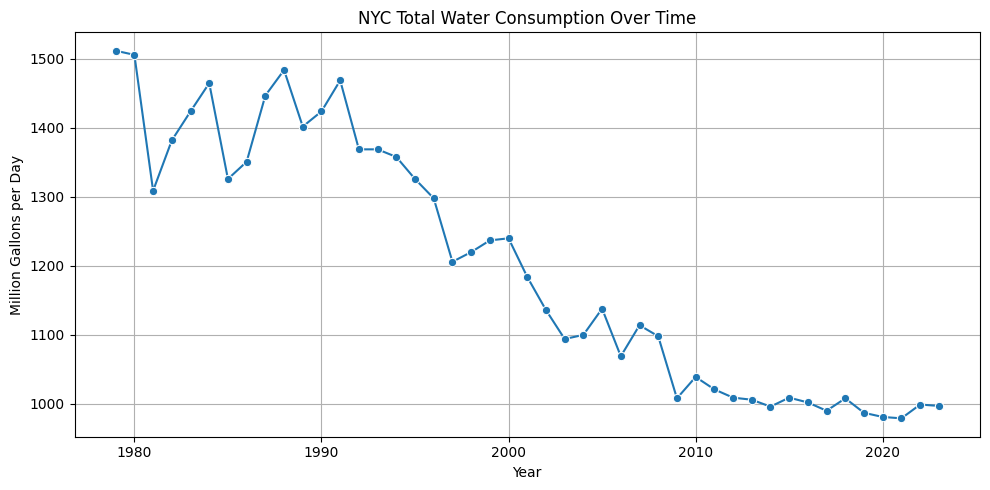

In [3]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='year', y='nyc_consumption_million_gallons_per_day', marker='o')
plt.title("NYC Total Water Consumption Over Time")
plt.xlabel("Year")
plt.ylabel("Million Gallons per Day")
plt.grid(True)
plt.tight_layout()
plt.show()


The total water consumption in NYC has steadily declined since the early 1990s, dropping from over 1,500 million gallons per day to under 1,000 million gallons by 2020. While the 1980s and early 1990s show some fluctuations, the downward trend is clear after-1995. This decline may be attributed to water conservation policies, infrastructure improvements, or shifts in industrial usage patterns.

2. How does population growth relate to water consumption?
 * Example: Scatter plot of population vs. consumption.
 * Follow-Up: Is per capita usage increasing or decreasing?




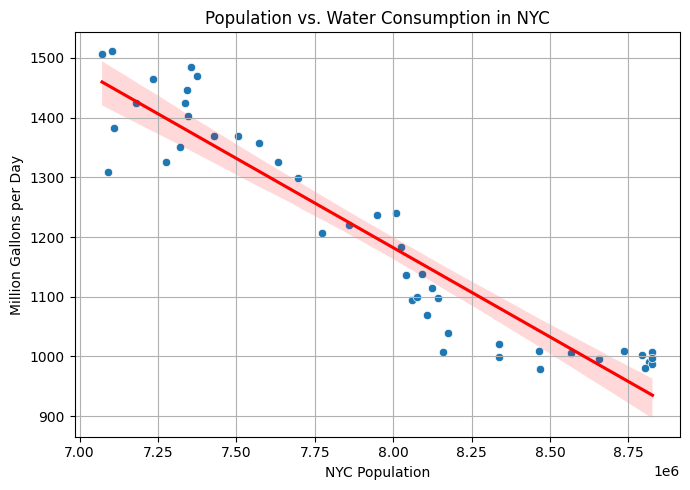

In [4]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='new_york_city_population', y='nyc_consumption_million_gallons_per_day')
sns.regplot(data=df, x='new_york_city_population', y='nyc_consumption_million_gallons_per_day', scatter=False, color='red')
plt.title("Population vs. Water Consumption in NYC")
plt.xlabel("NYC Population")
plt.ylabel("Million Gallons per Day")
plt.grid(True)
plt.tight_layout()
plt.show()

Interestingly, the scatter plot shows a negative relationship between population and water consumption — as NYC’s population has increased, total water consumption has decreased. This suggests that per capita efficiency has improved significantly, likely due to public awareness campaigns, technological advancements in water-saving devices, and regulatory measures.

3. What trends exist in per capita water use?
 * Example: Line plot of per capita gallons over time.
 * Follow-Up: How might your borough’s demographics (e.g., residential vs. commercial) affect this?

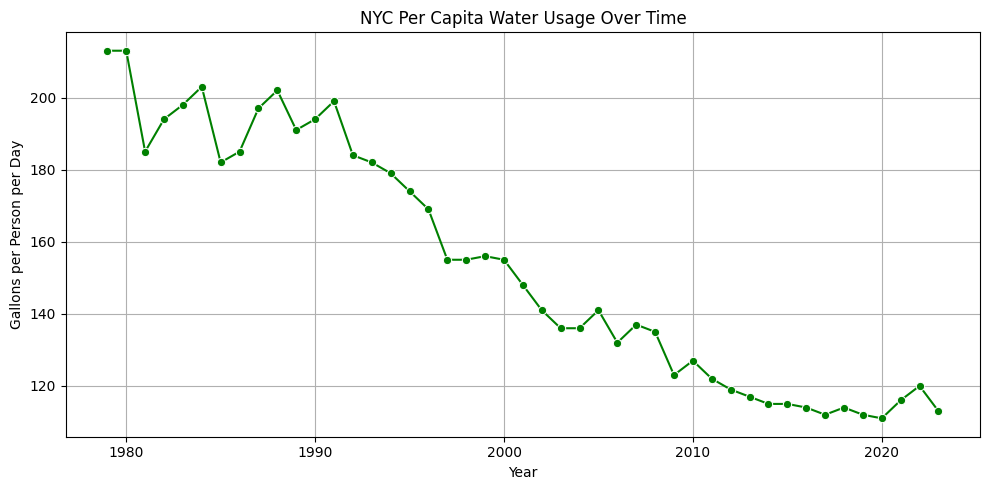

In [5]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='year', y='per_capita_gallons_per_person_per_day', marker='o', color='green')
plt.title("NYC Per Capita Water Usage Over Time")
plt.xlabel("Year")
plt.ylabel("Gallons per Person per Day")
plt.grid(True)
plt.tight_layout()
plt.show()

Per capita water usage in NYC has fallen sharply over the past four decades, from over 200 gallons per person per day in the 1980s to just under 120 gallons in recent years. The most significant drop occurred between 1995 and 2005. For a residential borough like Staten Island, this trend implies growing conservation success, but it also underscores the need to tailor future initiatives to account for household consumption patterns and potential population growth.

